In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import numpy as np # linerar algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
import os
print(os.listdir())  # Check if "marketing_campaign_dataset.csv" is in this list

['.virtual_documents']


In [23]:
import os
print(os.listdir("/kaggle/input"))

['marketing-campaign-datashet', 'marketing-campaign-performance-dataset']


In [26]:
import os
print(os.listdir("/kaggle/input/marketing-campaign-performance-dataset"))

['marketing_campaign_dataset.csv']


In [27]:
import pandas as pd

file_path = "/kaggle/input/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv"  # Update based on the correct folder
marketing_data = pd.read_csv(file_path)

print(marketing_data.head())  # Verify data loads correctly

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [28]:
print(marketing_data.isnull().sum())  # Check for missing values

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


In [29]:
campaign_performance = marketing_data.groupby('Campaign_Type')['Conversion_Rate'].mean().sort_values(ascending=False)
print(campaign_performance)

Campaign_Type
Influencer      0.080315
Social Media    0.080135
Display         0.080089
Search          0.080021
Email           0.079788
Name: Conversion_Rate, dtype: float64


In [30]:
channel_performance = marketing_data.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values(ascending=False)
print(channel_performance)

Channel_Used
Email         0.080282
Google Ads    0.080183
Website       0.080183
Facebook      0.079992
YouTube       0.079889
Instagram     0.079886
Name: Conversion_Rate, dtype: float64


In [31]:
engagement_performance = marketing_data.groupby('Campaign_Type')['Engagement_Score'].mean().sort_values(ascending=False)
print(engagement_performance)

Campaign_Type
Display         5.505889
Email           5.499624
Social Media    5.497878
Search          5.487138
Influencer      5.483134
Name: Engagement_Score, dtype: float64


In [32]:
click_performance = marketing_data.groupby('Channel_Used')['Clicks'].sum().sort_values(ascending=False)
print(click_performance)

Channel_Used
Email         18493963
Website       18414628
YouTube       18350407
Google Ads    18340807
Instagram     18316654
Facebook      18037947
Name: Clicks, dtype: int64


In [33]:
# Save Campaign Performance CSV
campaign_performance.to_csv("campaign_performance.csv", index=False)

# Save Channel Performance CSV
channel_performance.to_csv("channel_performance.csv", index=False)

# Save Click Performance CSV
click_performance.to_csv("click_performance.csv", index=False)

print("CSV files saved successfully!")

CSV files saved successfully!


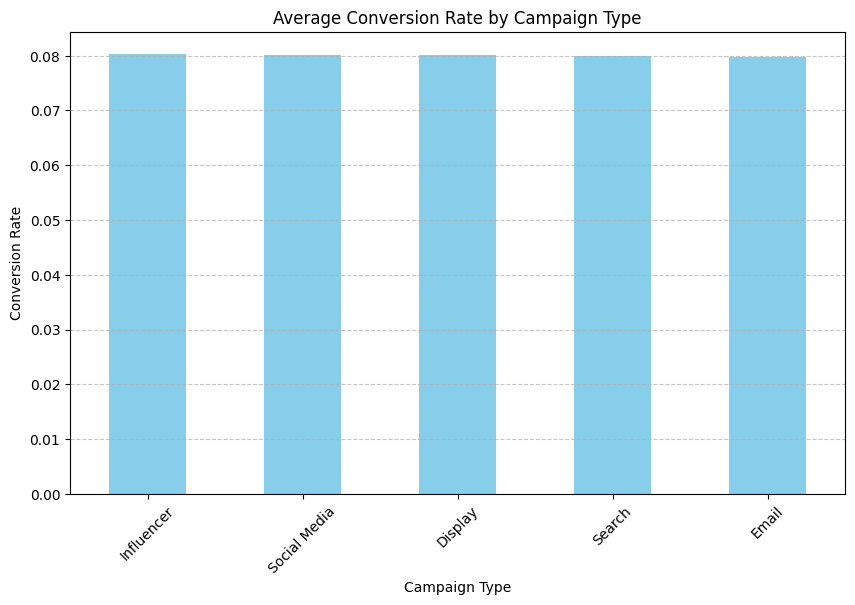

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
campaign_performance.plot(kind='bar', color='skyblue')
plt.title("Average Conversion Rate by Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("conversion_rate_by_campaign.png", dpi=300)  # Save the image
plt.show()

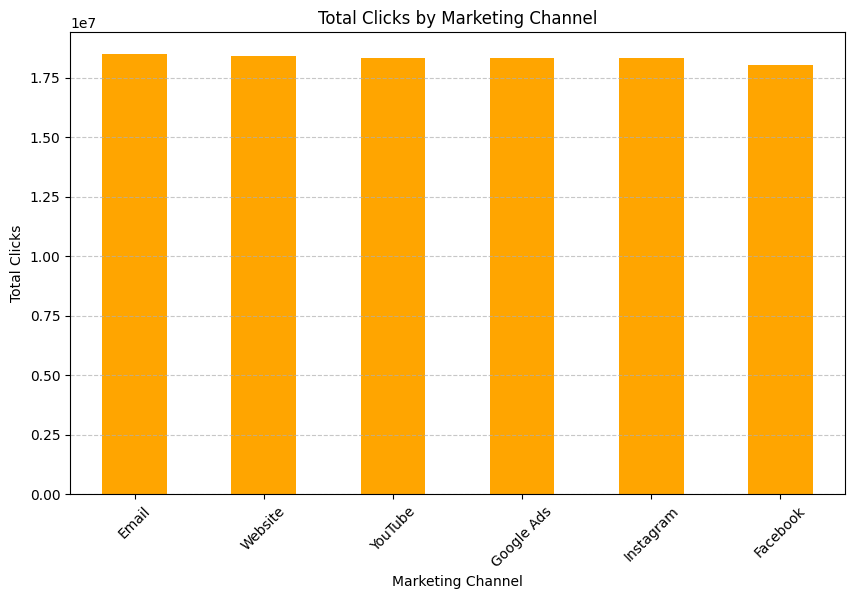

In [35]:
plt.figure(figsize=(10,6))
click_performance.plot(kind='bar', color='orange')
plt.title("Total Clicks by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Total Clicks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("clicks_by_channel.png", dpi=300)  # Save the image
plt.show()

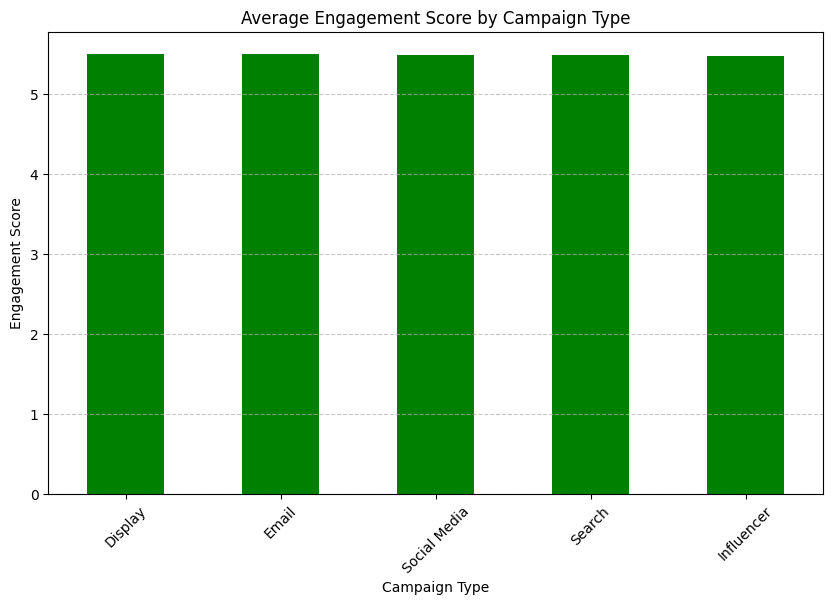

In [36]:
plt.figure(figsize=(10,6))
engagement_performance.plot(kind='bar', color='green')
plt.title("Average Engagement Score by Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("engagement_score_by_campaign.png", dpi=300)  # Save the image
plt.show()